# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
#install from command line before opening jupyter notebook as 'pip install citipy'
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Set base url and units variables, and combine them to get the query url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Create empty lists to store the data for each field
city_id_list = []
city_name_list = []
country_list = []
lng_list = []
lat_list = []
temp_list = []
humidity_list = []
clouds_list = []
wind_speed_list = []

# Loop through cities
for city in cities:
    
    # Get the JSON response from the OpenWeather API
    response_json = requests.get(query_url + city).json()
    
    # Start the error handling
    # Retrieve the items for each field and append them to the empty lists  
    try:
        
        city_id = response_json['id']
        city_id_list.append(city_id)
            
        city_name = response_json['name']
        city_name_list.append(city_name)
        
        country_name = response_json['sys']['country']
        country_list.append(country_name)

        lng = response_json['coord']['lon']
        lng_list.append(lng)

        lat = response_json['coord']['lat']
        lat_list.append(lat)

        temp = response_json['main']['temp']
        temp_list.append(temp)

        humidity = response_json['main']['humidity']
        humidity_list.append(humidity)

        clouds = response_json['clouds']['all']
        clouds_list.append(clouds)

        wind_speed = response_json['wind']['speed']
        wind_speed_list.append(wind_speed)
    
        print(f"City Name: {city}, City ID: {city_id}")
    
    # Print error message and move on to the next city if there is an error
    except:
        
        print("That record does not exist, searching for next record...")

City Name: albany, City ID: 5106841
City Name: ushuaia, City ID: 3833367
City Name: rio gallegos, City ID: 3838859
City Name: arraial do cabo, City ID: 3471451
City Name: atuona, City ID: 4020109
City Name: cabo san lucas, City ID: 3985710
City Name: yellowknife, City ID: 6185377
City Name: saldanha, City ID: 3361934
City Name: hermanus, City ID: 3366880
City Name: faya, City ID: 110690
City Name: nizhniy kuranakh, City ID: 2019135
City Name: colares, City ID: 2269142
City Name: iisalmi, City ID: 656820
City Name: mar del plata, City ID: 3430863
That record does not exist, searching for next record...
City Name: kavieng, City ID: 2094342
City Name: san bartolome de tirajana, City ID: 2511440
City Name: qasigiannguit, City ID: 3420768
City Name: atbasar, City ID: 1526038
City Name: rikitea, City ID: 4030556
That record does not exist, searching for next record...
That record does not exist, searching for next record...
City Name: dikson, City ID: 1507390
City Name: jertih, City ID: 1736

City Name: iqaluit, City ID: 5983720
City Name: deming, City ID: 5464806
City Name: tsiroanomandidy, City ID: 1054463
City Name: aswan, City ID: 359792
City Name: pisco, City ID: 3932145
City Name: villa carlos paz, City ID: 3832791
City Name: thunder bay, City ID: 6166142
City Name: eureka, City ID: 5563397
City Name: ilulissat, City ID: 3423146
City Name: rio grande, City ID: 3451138
City Name: petropavlovsk-kamchatskiy, City ID: 2122104
City Name: general roca, City ID: 3855065
City Name: hanmer springs, City ID: 2190299
City Name: alyangula, City ID: 2079582
City Name: richards bay, City ID: 962367
City Name: doka, City ID: 376332
City Name: pangkalanbuun, City ID: 1632694
City Name: saquena, City ID: 3692020
City Name: khatanga, City ID: 2022572
City Name: batagay-alyta, City ID: 2027042
City Name: nouadhibou, City ID: 2377457
City Name: ribeira grande, City ID: 3372707
City Name: puerto princesa, City ID: 1692685
City Name: te anau, City ID: 2181625
That record does not exist, se

City Name: lardos, City ID: 408689
City Name: miles city, City ID: 5666176
City Name: severnoye, City ID: 1492607
City Name: boundiali, City ID: 2290836
City Name: yubari, City ID: 2127419
City Name: songjianghe, City ID: 2034691
City Name: vao, City ID: 2137773
City Name: quatre cocos, City ID: 1106643
City Name: dzhuryn, City ID: 710400
City Name: yantal, City ID: 2055868
That record does not exist, searching for next record...
City Name: kamina, City ID: 214614
City Name: puerto colombia, City ID: 3671497
City Name: hay river, City ID: 5972762
City Name: saint-philippe, City ID: 935215
City Name: miri, City ID: 1738050
City Name: tezu, City ID: 1254709
City Name: muros, City ID: 3115824
City Name: komsomolskiy, City ID: 1513491
City Name: laguna, City ID: 5364271
City Name: tiksi, City ID: 2015306
City Name: nelson bay, City ID: 2155562
City Name: visby, City ID: 2662689
That record does not exist, searching for next record...
City Name: smolenka, City ID: 2016405
City Name: clarenc

City Name: tabas, City ID: 113659
City Name: boende, City ID: 218680
City Name: uusikaupunki, City ID: 633221
City Name: novooleksiyivka, City ID: 699706
City Name: urumqi, City ID: 1529102
City Name: mitu, City ID: 3674676
That record does not exist, searching for next record...
City Name: tagusao, City ID: 1684245
City Name: high level, City ID: 5975004


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Convert the data into a dataframe
cities_df = pd.DataFrame({"City ID": city_id_list, "City": city_name_list, "Country": country_list, "Lat": lat_list, "Lng": lng_list,
                         "Temperature": temp_list, "Humidity": humidity_list, "Clouds": clouds_list,
                         "Wind Speed": wind_speed_list})
cities_df.head()

,City ID,City,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed
0,5106841,Albany,US,42.6001,-73.9662,38.03,91,92,3.13
1,3833367,Ushuaia,AR,-54.8000,-68.3000,49.66,46,20,14.97
2,3838859,Río Gallegos,AR,-51.6226,-69.2181,48.25,71,75,0.00
3,3471451,Arraial do Cabo,BR,-22.9661,-42.0278,73.26,94,75,6.91
4,4020109,Atuona,PF,-9.8000,-139.0333,78.10,69,23,15.43


In [5]:
# Export to .csv file
cities_df.to_csv(output_data_file,index=False, header=True)


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

 This plot is looking at the relationship between latitude and temperature. It shows that as you aprroach the equator (latitude 0) the temperature gets hotter.

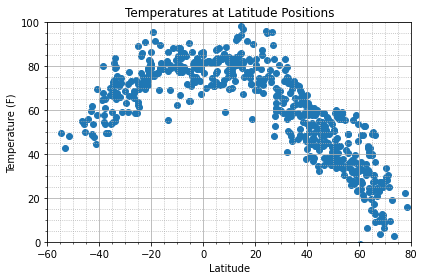

In [6]:
x_values = cities_df["Lat"]
y_values = cities_df["Temperature"]

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(0, 100)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.savefig("lat_temp.png")
plt.show()



## Latitude vs. Humidity Plot

This plot is looking at the relationship between latitude and humidity. It shows that there is not much of a correlation between latitude and humidity.


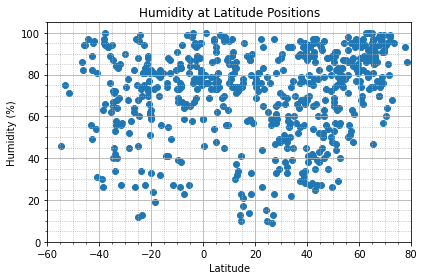

In [20]:
x_values = cities_df["Lat"]
y_values = cities_df["Humidity"]

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.savefig("lat_humid.png")
plt.show()


## Latitude vs. Cloudiness Plot

This plot is looking at the relationship between latitude and cloudiness. This also shows that there does not seem to be much of a correlation between latitude and cloudiness.

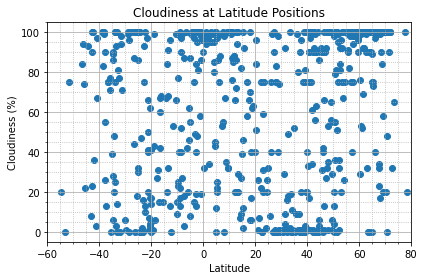

In [21]:
x_values = cities_df["Lat"]
y_values = cities_df["Clouds"]

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.savefig("lat_clouds.png")
plt.show()


## Latitude vs. Wind Speed Plot

This plot is looking at the relationship between latitude and wind speed. It shows that wind speeds are generally greater the farther away from the equator (latitude 0) you get

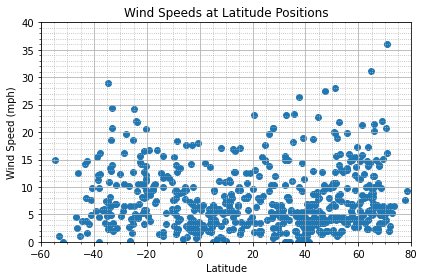

In [22]:
x_values = cities_df["Lat"]
y_values = cities_df["Wind Speed"]

plt.scatter(x_values,y_values)
plt.title('Wind Speeds at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.savefig("lat_wind.png")
plt.show()


## Linear Regression

In [10]:
#  OPTIONAL: Create a function to create Linear Regression plots
# Add the linear regression equation and line to plot
def linear_reg_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [11]:
# Create Northern and Southern Hemisphere DataFrames
Northern_hemisphere = cities_df.loc[cities_df["Lat"]>0]
Southern_hemisphere = cities_df.loc[cities_df["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8757804853999158


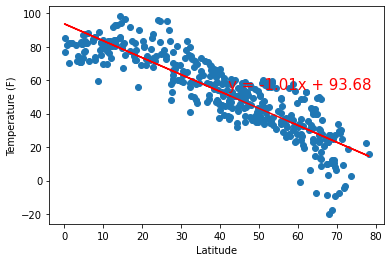

None


In [12]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Temperature"]
plt.ylabel("Temperature (F)")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.685168704096868


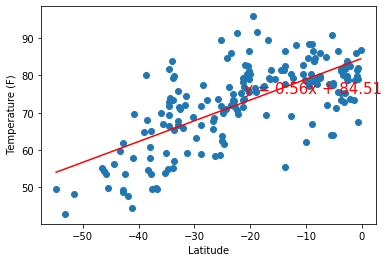

None


In [13]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Temperature"]
plt.ylabel(" Temperature (F)")
print(linear_reg_plot(x_values,y_values))

Max Temp vs. Latitude Linear Regression
Both the Northern and Southern Hemispheres show the same inverse relationship between latitude and temperature. As you get closer to the equator (latitude 0) the higher the temperature gets. There is a strong correlation for both hemishperes, but the Northern Hemisphere seems to have an almost one to one relationshi

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.25381661098081865


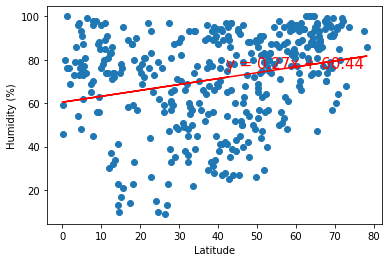

None


In [14]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Humidity"]
plt.ylabel("Humidity (%)")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0947041601445358


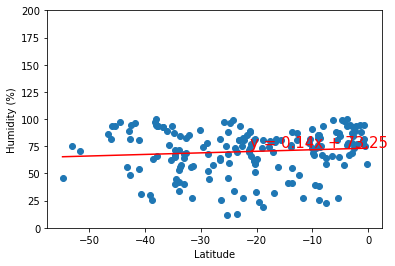

None


In [15]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Humidity"]
plt.ylim(0, y_values.max()+100)
plt.ylabel("Humidity (%)")
print(linear_reg_plot(x_values,y_values))

Humidity % vs. Latitude Linear Regression
There does not seem to be a very strong correlation between humidity and latitude. However, there does seem to be a slight positive correlation in the Northern Hemisphere and a slight negative correlation in the Southern Hemisphere; meaning in the Northern Hemisphere as you get further away from the equator (latitude 0) humidity increases, and in the Southern Hemisphere it decreases as you get further away from the equator.


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.20419661997382693


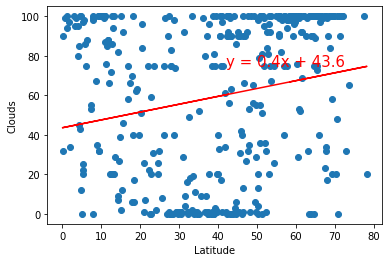

None


In [16]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Clouds"]
plt.ylabel("Clouds")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.03492389639347671


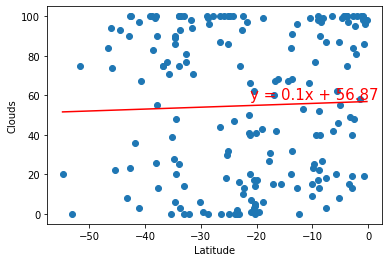

None


In [17]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Clouds"]
plt.ylabel("Clouds")
print(linear_reg_plot(x_values,y_values))

Cloudiness vs. Latitude Linear Regression
There does not seem to be much correlation between cloudiness and latitude when you look at the plots. However, when the linear regression is performed, you can see that there is a slight positive correlation in the Northern Hemisphere but a strong negative correlation in the Southern Hemisphere. In the Southern Hemisphere it shows that the further you are from the equator (latitude 0) the less cloudy it is.


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.15285464899228496


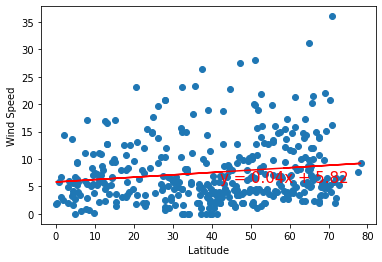

None


In [18]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.09677011029112861


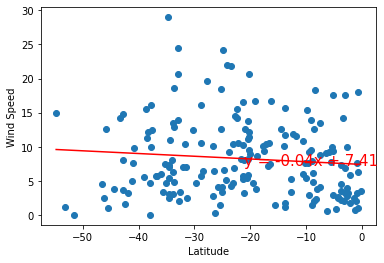

None


In [19]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))

Wind Speed vs. Latitude Linear Regression
There does seem to be a pretty strong correlation between wind sped and latitude when you look at the plots. However, the linear regresion shows a much lower correlation than it appears. There is still a definite correlation in both hemispheres, in that the further you are from the equator (latitude 0) the higher the wind speeds are, but the slope of the regression line is much shallower than I was expecting looking at the plots.